## Diabetic Retinopathy

In this kernel we wil use Convolutional Neural Networks to predict the probability that wether a person is suffering from DIabteic Retinopathy or not using the sample images provided to us in the dataset.

**Diabetic retinopathy** is a diabetes complication that affects eyes. It's caused by damage to the blood vessels of the light-sensitive tissue at the back of the eye (retina). At first, diabetic retinopathy may cause no symptoms or only mild vision problems.

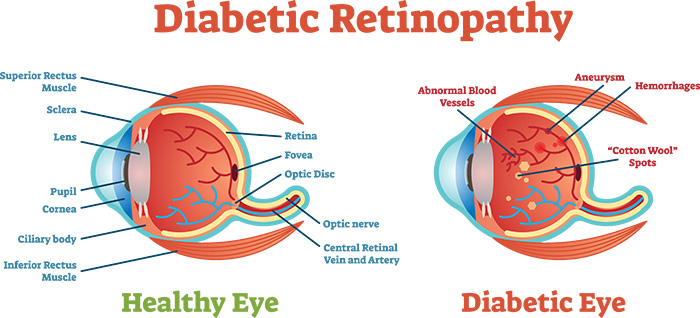

You might not have symptoms in the early stages of diabetic retinopathy. As the condition progresses, diabetic retinopathy symptoms may include:

* Spots or dark strings floating in your vision (floaters)
* Blurred vision
* Fluctuating vision
* Impaired color vision
* Dark or empty areas in your vision
* Vision loss
* Diabetic retinopathy usually affects both eyes.

**Diabetic retinopathy can lead to other serious eye conditions:** 

1. Diabetic macular edema (DME). Over time, about half of people with diabetic retinopathy will develop DME. DME happens when blood vessels in the retina leak fluid, causing swelling in the macula (a part of the retina). If you have DME, your vision will become blurry because of the extra fluid in your macula.  

2. Neovascular glaucoma. Diabetic retinopathy can cause abnormal blood vessels to grow out of the retina and block fluid from draining out of the eye. This causes a type of glaucoma.

Diabetic retinopathy is caused by high blood sugar due to diabetes. Over time, having too much sugar in your blood can damage your retina — the part of your eye that detects light and sends signals to your brain through a nerve in the back of your eye (optic nerve).  



Diabetes damages blood vessels all over the body. The damage to your eyes starts when sugar blocks the tiny blood vessels that go to your retina, causing them to leak fluid or bleed. To make up for these blocked blood vessels, your eyes then grow new blood vessels that don’t work well. These new blood vessels can leak or bleed easily. 

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Using the Image Data Generator 

In [3]:
datagen = ImageDataGenerator(rescale=1./255,
                                      zoom_range=0.2,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      validation_split=0.2
                                      )
train_data = datagen.flow_from_directory('/kaggle/input/diabetes-retinopathy-g/fold 1/train',
                                                     target_size=(224,224),
                                                     batch_size=30,
                                                     class_mode = 'categorical',
                                                     subset = 'training')

test_data = datagen.flow_from_directory('/kaggle/input/diabetes-retinopathy-g/fold 1/test',
                                                     target_size=(224,224),
                                                     batch_size=30,
                                                     class_mode = 'categorical',
                                                     subset = 'validation')

Found 2346 images belonging to 5 classes.
Found 144 images belonging to 5 classes.


## Now, let us try Efficient Net

Google recently published both a very exciting paper and source code for a newly designed CNN (convolutional neural network) called EfficientNet, that set new records for both accuracy and computational efficiency.
This was not a minor improvement but rather an accuracy improvement of up to 6% while on the order of 5–10x more efficient than most current CNN’s. 

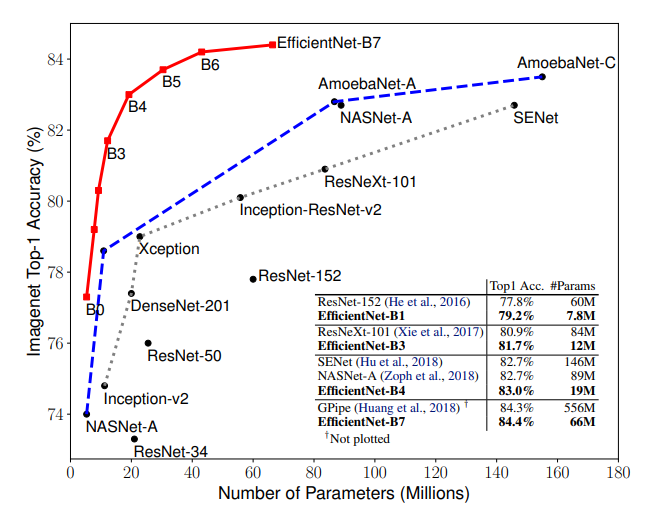

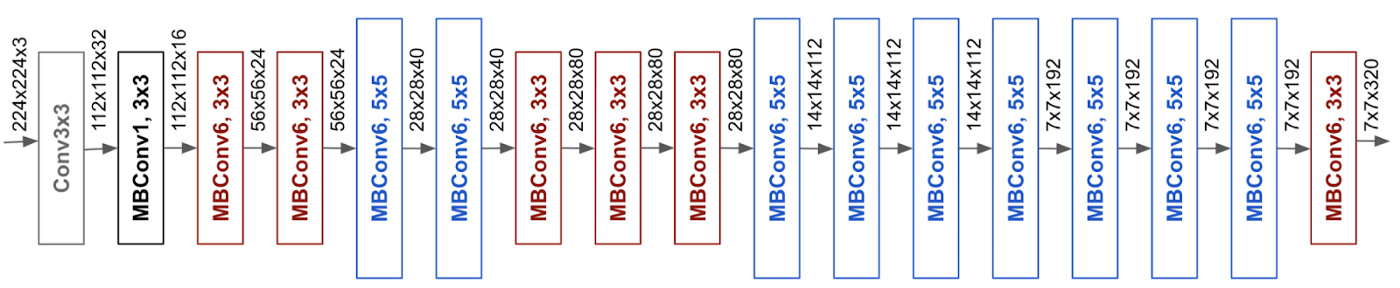

## Using EfficientNet for Transfer Learning

In [4]:
!pip install -q efficientnet

In [5]:
import efficientnet.tfkeras as efn

## Defining the learning rate scheduler

In [6]:
def lr_rate(epoch,lr):
    if epoch<10:
        lr=0.0001
        return lr
    elif epoch<=15:
        lr=0.0005
        return lr
    elif epoch<=30:
        lr=0.0001
        return lr
    else:
        lr=lr*(epoch/(1+epoch))
        return lr
lr_callback=tf.keras.callbacks.LearningRateScheduler(lr_rate)

In [7]:
model = tf.keras.Sequential([
        efn.EfficientNetB4(
            input_shape=(224,224, 3),
            weights='imagenet',
            include_top=False
        ),tf.keras.layers.Flatten(),tf.keras.layers.Dense(5, activation='softmax')
    ])
    
model.compile(optimizer="Adam",loss='categorical_crossentropy',metrics=['acc'])


71892840/71892840 [==============================] - 0s 0us/step


In [8]:
history=model.fit(train_data,callbacks=[lr_callback],epochs=100,verbose=1)

Epoch 1/100


2023-10-26 09:29:02.754653: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/efficientnet-b4/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


79/79 [==============================] - 142s 609ms/step - loss: 1.0540 - acc: 0.6373 - lr: 1.0000e-04
Epoch 2/100
79/79 [==============================] - 45s 561ms/step - loss: 0.7657 - acc: 0.7123 - lr: 1.0000e-04
Epoch 3/100
79/79 [==============================] - 46s 572ms/step - loss: 0.6660 - acc: 0.7553 - lr: 1.0000e-04
Epoch 4/100
79/79 [==============================] - 46s 575ms/step - loss: 0.6110 - acc: 0.7822 - lr: 1.0000e-04
Epoch 5/100
79/79 [==============================] - 46s 574ms/step - loss: 0.5392 - acc: 0.8022 - lr: 1.0000e-04
Epoch 6/100
79/79 [==============================] - 46s 575ms/step - loss: 0.5178 - acc: 0.8073 - lr: 1.0000e-04
Epoch 7/100
79/79 [==============================] - 46s 576ms/step - loss: 0.4940 - acc: 0.8197 - lr: 1.0000e-04
Epoch 8/100
79/79 [==============================] - 46s 575ms/step - loss: 0.4341 - acc: 0.8372 - lr: 1.0000e-04
Epoch 9/100
79/79 [==============================] - 46s 581ms/step - loss: 0.4184 - acc: 0.8431 - 

## We got smoother validation and training curves.

In [9]:
import matplotlib.pyplot as plt

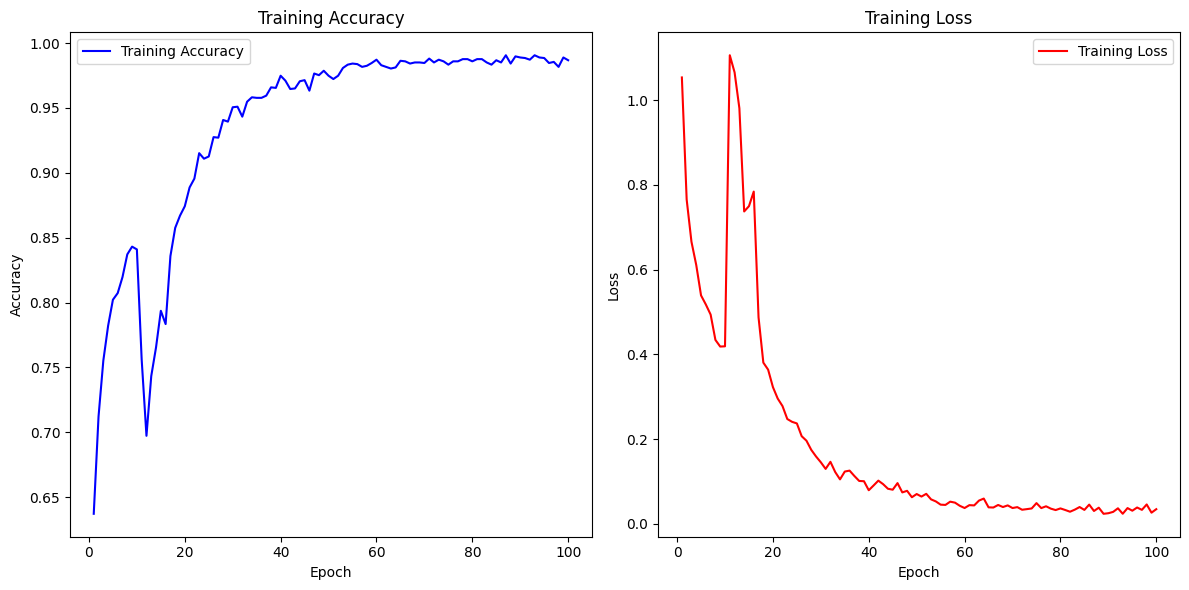

In [10]:
import matplotlib.pyplot as plt

# Extract accuracy and loss values from the history object
accuracy = history.history['acc']
loss = history.history['loss']

# Create a list of epochs for x-axis
epochs = range(1, len(accuracy) + 1)

# Plot accuracy as a line graph
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b-', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss as a line graph
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r-', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
# save the trained model to use
model.save('/kaggle/working/modelDR.h5')

In [12]:
# get class names associated with dataset images
categories = ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']
print(categories)

['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']


In [13]:
import numpy as np

1/1 [==============================] - 3s 3s/step


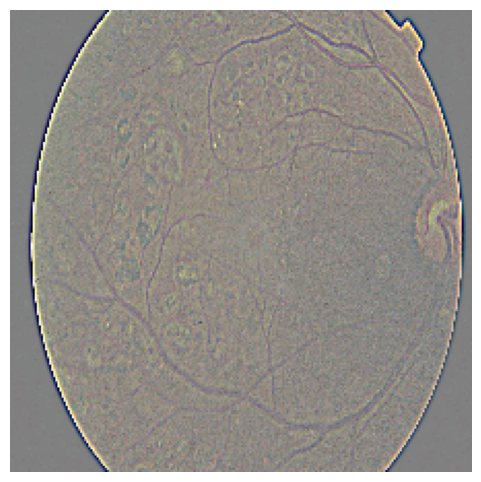

Predicted case -> Proliferate_DR


In [14]:
# Testing the model using sample image
image_path = "/kaggle/input/diabetes-retinopathy-g/fold 1/test/proliferative/0ceb222f6629.png"
image = tf.keras.preprocessing.image.load_img(image_path)
image = image.resize((224,224))
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = image_array / 255.0
scaled_img = np.expand_dims(image_array, axis=0)
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis("off")

# Use model to predict the sample image
pred = model.predict(scaled_img)

# show the output of predicted image
output = categories[np.argmax(pred)]
plt.show()
print("Predicted case ->", output)

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import random 

In [16]:
# Load the saved model
model = tf.keras.models.load_model('/kaggle/working/modelDR.h5')

# Function to evaluate the model on a random subset of test data
def evaluate_random_subset(model, test_data, num_samples=20):
    test_pred_labels = []
    test_true_labels = []

    # Randomly select a smaller number of samples from the indices of the entire test dataset
    num_samples = min(num_samples, len(test_data))
    random_indices = random.sample(range(len(test_data)), num_samples)

    for index in random_indices:
        # Get the batch of images and labels
        batch_images, batch_labels = test_data[index]

        # Make predictions for each image in the batch
        batch_pred_labels = []
        for image in batch_images:
            image = np.expand_dims(image, axis=0)  # Add a batch dimension
            batch_predictions = model.predict(image)
            batch_pred_labels.append(np.argmax(batch_predictions, axis=1))

        # Extend the true and predicted labels
        test_true_labels.extend(np.argmax(batch_labels, axis=1))
        test_pred_labels.extend(batch_pred_labels)

    return test_true_labels, test_pred_labels

In [17]:
# Evaluate the model on a random subset of 20 test images
test_true_labels, test_pred_labels = evaluate_random_subset(model, test_data, num_samples=20)

# Calculate accuracy and F1 score
accuracy = accuracy_score(test_true_labels, test_pred_labels)
f1 = f1_score(test_true_labels, test_pred_labels, average='weighted')

# Print the results
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

# Print the classification report
classification_report_str = classification_report(test_true_labels, test_pred_labels)
print('Classification Report:\n', classification_report_str)

1/1 [==============================] - 0s 34ms/step
Accuracy: 0.8472222222222222
F1 Score: 0.8338058665901042
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.72      0.82      0.77        40
           2       0.99      0.99      0.99        72
           3       0.73      0.73      0.73        11
           4       0.00      0.00      0.00         7

    accuracy                           0.85       144
   macro avg       0.64      0.65      0.64       144
weighted avg       0.82      0.85      0.83       144



5/5 [==============================] - 6s 522ms/step


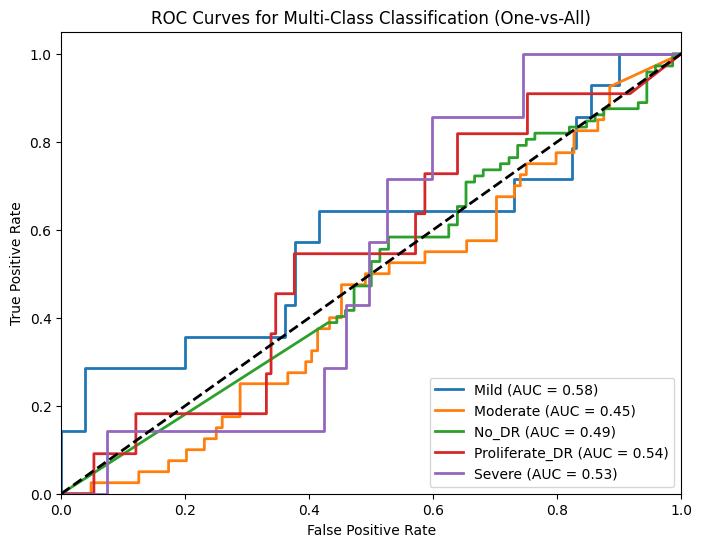

In [18]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Use the model to predict probabilities for the test data
predicted_probabilities = model.predict(test_data)

# Number of classes
n_classes = len(categories)

# Initialize ROC curve data structures
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    # True labels for the current class
    true_labels = (test_data.classes == i).astype(int)

    # Calculate ROC curve for the current class
    fpr[i], tpr[i], _ = roc_curve(true_labels, predicted_probabilities[:, i])

    # Calculate AUC for the ROC curve
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{categories[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Class Classification (One-vs-All)')
plt.legend(loc="lower right")
plt.show()


In [19]:
from sklearn.metrics import precision_score

# Use the model to predict class probabilities for the test data
predicted_probabilities = model.predict(test_data)

# Get the predicted class labels by selecting the class with the highest probability
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Get the true class labels from the test data
true_labels = test_data.classes

# Calculate PPV (Precision) for each class
ppv_scores = []
for i in range(len(categories)):
    class_name = categories[i]
    true_positive = np.sum((true_labels == i) & (predicted_labels == i))
    false_positive = np.sum((true_labels != i) & (predicted_labels == i))
    ppv = true_positive / (true_positive + false_positive)
    ppv_scores.append(ppv)
    print(f'Precision (PPV) for class {categories}: {ppv:.2f}')

# Calculate and print the overall weighted average PPV
weighted_avg_ppv = precision_score(true_labels, predicted_labels, average='weighted')
print(f'Weighted Average Precision (PPV): {weighted_avg_ppv:.2f}')


5/5 [==============================] - 2s 361ms/step
Precision (PPV) for class ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']: 0.08
Precision (PPV) for class ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']: 0.23
Precision (PPV) for class ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']: 0.48
Precision (PPV) for class ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']: 0.00
Precision (PPV) for class ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']: 0.00
Weighted Average Precision (PPV): 0.31


In [20]:
from sklearn.metrics import confusion_matrix

# Use the model to predict class labels for the test data
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Extract true labels from the test data
true_labels = test_data.classes

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Calculate NPV for each class
npv = []
for i in range(n_classes):
    # True negatives (TN) for the current class
    tn = np.sum(np.logical_and(predicted_labels != i, true_labels != i))

    # Total negatives (TN + FP) for the current class
    total_negatives = np.sum(predicted_labels != i)

    # Calculate NPV for the current class
    class_npv = tn / total_negatives
    npv.append(class_npv)

# Display NPV for each class
for i, class_name in enumerate(categories):
    print(f'{class_name} NPV: {npv[i]:.2f}')


Mild NPV: 0.90
Moderate NPV: 0.70
No_DR NPV: 0.48
Proliferate_DR NPV: 0.92
Severe NPV: 0.95


In [21]:
from sklearn.metrics import recall_score

# Use the model to predict class labels for the test data
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Extract true labels from the test data
true_labels = test_data.classes

# Calculate Sensitivity (Recall) for each class
sensitivity = recall_score(true_labels, predicted_labels, average=None)

# Display Sensitivity (Recall) for each class
for i, class_name in enumerate(categories):
    print(f'{class_name} Sensitivity (Recall): {sensitivity[i]:.2f}')


Mild Sensitivity (Recall): 0.07
Moderate Sensitivity (Recall): 0.25
No_DR Sensitivity (Recall): 0.49
Proliferate_DR Sensitivity (Recall): 0.00
Severe Sensitivity (Recall): 0.00


In [22]:
from sklearn.metrics import confusion_matrix

# Use the model to predict class labels for the test data
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Extract true labels from the test data
true_labels = test_data.classes

# Initialize a list to store specificity values for each class
specificity = []

# Calculate specificity for each class
for i in range(n_classes):
    # Confusion matrix for the current class
    tn = np.sum(np.logical_and(predicted_labels != i, true_labels != i))  # True negatives
    fp = np.sum(np.logical_and(predicted_labels == i, true_labels != i))  # False positives

    # Calculate specificity for the current class
    class_specificity = tn / (tn + fp)
    specificity.append(class_specificity)

# Display specificity for each class
for i, class_name in enumerate(categories):
    print(f'{class_name} Specificity: {specificity[i]:.2f}')


Mild Specificity: 0.91
Moderate Specificity: 0.67
No_DR Specificity: 0.47
Proliferate_DR Specificity: 0.92
Severe Specificity: 0.98


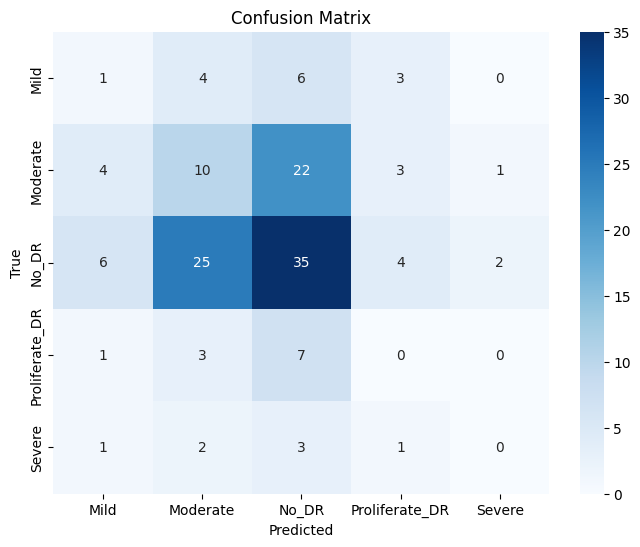

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Use the model to predict class labels for the test data
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Extract true labels from the test data
true_labels = test_data.classes

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


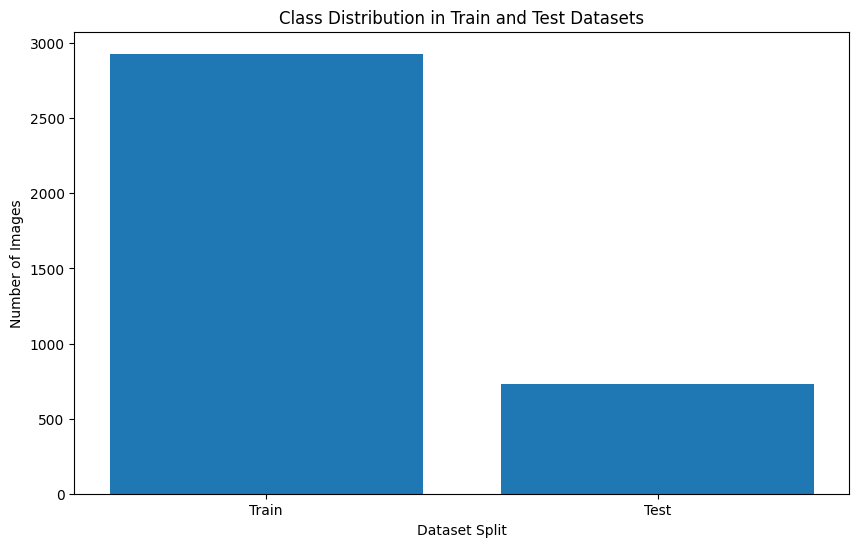

In [24]:
import os
import matplotlib.pyplot as plt

# Define the path to your dataset
dataset_path = '/kaggle/input/diabetes-retinopathy-g/fold 1/'

# Define class names
categories = ['mild', 'moderate', 'no_DR', 'proliferative', 'severe']

# Initialize counters for each class
class_counts = {class_name: 0 for class_name in categories}

# Function to count the number of images in each class
def count_images_in_class(class_path):
    class_count = 0
    for class_name in categories:
        class_count += len(os.listdir(os.path.join(class_path, class_name)))
    return class_count

# Get class counts for the "train" and "test" directories
train_path = os.path.join(dataset_path, '/kaggle/input/diabetes-retinopathy-g/fold 1/train')
test_path = os.path.join(dataset_path, '/kaggle/input/diabetes-retinopathy-g/fold 1/test')

train_class_count = count_images_in_class(train_path)
test_class_count = count_images_in_class(test_path)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(['Train', 'Test'], [train_class_count, test_class_count])
plt.xlabel('Dataset Split')
plt.ylabel('Number of Images')
plt.title('Class Distribution in Train and Test Datasets')
plt.show()

In [30]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Use the model to predict class labels for the test data
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Extract true labels from the test data
true_labels = test_data.classes

# Calculate accuracy, F1 score, and confusion matrix
accuracy = accuracy_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels, average='weighted')
cm = confusion_matrix(true_labels, predicted_labels)

# Calculate precision, recall, NPV, and specificity for each class
classification_rep = classification_report(true_labels, predicted_labels, target_names=categories, output_dict=True)
precision = [classification_rep[class_name]['precision'] for class_name in categories]
recall = [classification_rep[class_name]['recall'] for class_name in categories]

# Create a results DataFrame
results = pd.DataFrame({
    'Class': categories,
    'Precision': precision,
    'Recall': recall,
    'Accuracy': [accuracy] * len(categories),
    'F1 Score': [f1] * len(categories),
})

# Display the results in tabular form
print(results)


           Class  Precision    Recall  Accuracy  F1 Score
0           mild   0.076923  0.071429  0.319444  0.314719
1       moderate   0.227273  0.250000  0.319444  0.314719
2          no_DR   0.479452  0.486111  0.319444  0.314719
3  proliferative   0.000000  0.000000  0.319444  0.314719
4         severe   0.000000  0.000000  0.319444  0.314719


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

# Define the paths to the saved models for each architecture
model_paths = {
    'ResNet-101': '/path/to/resnet101_model.h5',
    'Inception V3': '/path/to/inceptionv3_model.h5',
    'EfficientNet B4': '/kaggle/working/modelDR.h5',
    'ResNet-50 V2': '/path/to/resnet50v2_model.h5',
}

# Initialize lists to store model names and evaluation metrics
model_names = []
accuracies = []
f1_scores = []

# Load and evaluate each model
for model_name, model_path in model_paths.items():
    # Load the model
    model = tf.keras.models.load_model(model_path)
    
    # Use the model to predict labels for the test data
    predicted_probabilities = model.predict(test_data)
    predicted_labels = np.argmax(predicted_probabilities, axis=1)
    
    # Calculate accuracy and F1 score
    accuracy = accuracy_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels, average='weighted')
    
    # Append results to the lists
    model_names.append(model_name)
    accuracies.append(accuracy)
    f1_scores.append(f1)

# Create a DataFrame to display the results
results_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies, 'Weighted F1 Score': f1_scores})

# Print the benchmark table
print(results_df)
